In [1]:
libraries<-c("DESeq2","ggplot2","viridis","RColorBrewer","pheatmap","edgeR","ggfortify")
suppressPackageStartupMessages(lapply(libraries, require, character.only = TRUE))

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

In [2]:
countData <- read.csv("/media/eduardo/D2/mapping_hisat_RNAseq_Lluteus/Anthracnose_papaer_RNAseq/counts_and_samples/Lluteus_Anthacnose_hypocotyl.txt",
                      sep = '\t',row.names=1)

In [3]:
samples <- read.delim("/media/eduardo/D2/mapping_hisat_RNAseq_Lluteus/Anthracnose_papaer_RNAseq/counts_and_samples/sampledata_hypocotyl.txt",
                      header=T)

In [4]:
samples

sample,hpi,genotype,biosample,response,tissue,treatment
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
C195_60H_1,060HPI,C195,R1,Susceptible,hypocotyl,060HPI_C195
C195_60H_2,060HPI,C195,R2,Susceptible,hypocotyl,060HPI_C195
C195_60H_3,060HPI,C195,R3,Susceptible,hypocotyl,060HPI_C195
C195_60H_4,060HPI,C195,R4,Susceptible,hypocotyl,060HPI_C195
C195_84H_1,084HPI,C195,R1,Susceptible,hypocotyl,084HPI_C195
C195_84H_2,084HPI,C195,R2,Susceptible,hypocotyl,084HPI_C195
C195_84H_3,084HPI,C195,R3,Susceptible,hypocotyl,084HPI_C195
C195_84H_4,084HPI,C195,R4,Susceptible,hypocotyl,084HPI_C195
C195_24H_1,024HPI,C195,R1,Susceptible,hypocotyl,024HPI_C195


In [5]:
countData[,1:5] <- NULL

In [6]:
dds <- DESeqDataSetFromMatrix(countData=countData, 
                              colData=samples, 
                              design= ~ genotype  + hpi + hpi:genotype)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [7]:
dds

class: DESeqDataSet 
dim: 36885 32 
metadata(1): version
assays(1): counts
rownames(36885): Llu36397 Llu36588 ... Llu25810 Llu25811
rowData names(0):
colnames(32): C195_24H_1 C195_24H_2 ... C98.C3 C98.C4
colData names(7): sample hpi ... tissue treatment

In [8]:
dds$genotype<-as.factor(dds$genotype)
dds$hpi<-as.factor(dds$hpi)
dds$tissue<-as.factor(dds$tissue)

In [9]:
dds$group <- factor(paste0(dds$hpi, dds$genotype,dds$tissue))

In [10]:
design(dds) <- ~ group

In [11]:
dds <- DESeq(dds,parallel = TRUE)

estimating size factors

estimating dispersions

gene-wise dispersion estimates: 30 workers

mean-dispersion relationship

final dispersion estimates, fitting model and testing: 30 workers



In [12]:
res<-results(dds, cooksCutoff=FALSE, independentFiltering=FALSE)

In [13]:
normcounts<-as.data.frame(counts(dds,normalized =TRUE))

In [14]:
vsd <- vst(dds, blind = FALSE)

using ntop=500 top features by variance



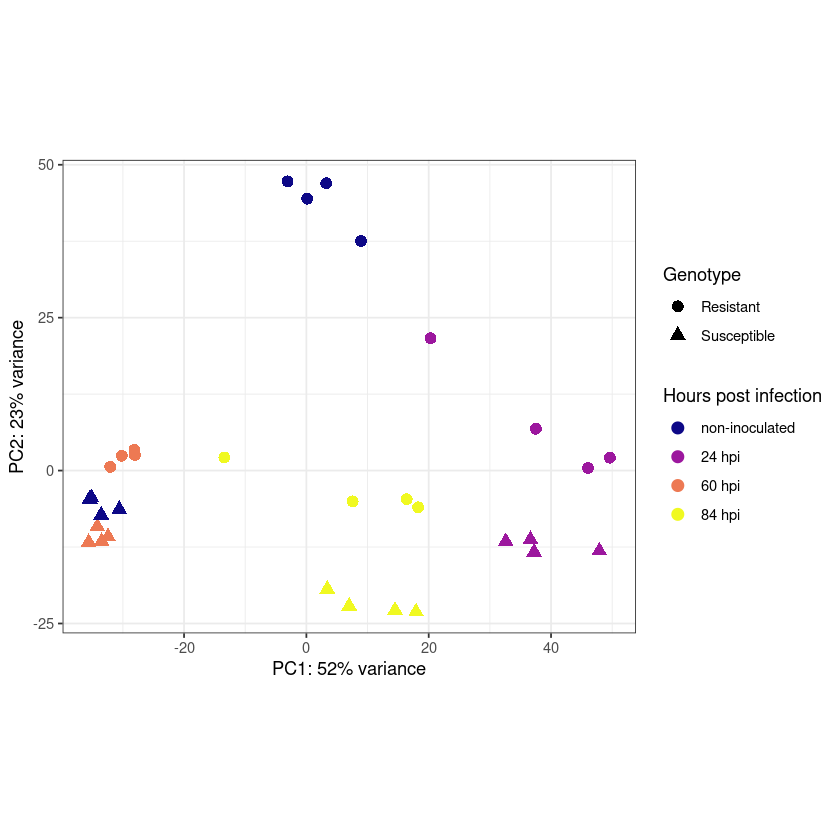

In [15]:
pcaData<-plotPCA(vsd, intgroup=c("response", "hpi","tissue"), returnData=TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
pcaD<-ggplot(pcaData, aes(PC1, PC2, color=hpi, shape=response,linetype=tissue)) +
  geom_point(size=3)  +
  guides(col=guide_legend("Hours post infection"),
         shape=guide_legend("Genotype"))+
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) + 
  scale_colour_viridis_d(option = "C",labels=c("000HPI" = "non-inoculated", 
                                              "024HPI" = "24 hpi",
                                              "060HPI" = "60 hpi", 
                                              "084HPI" = "84 hpi"))+
  coord_fixed()+
  theme_bw()
pcaD

In [16]:
ggsave("/media/eduardo/D2/mapping_hisat_RNAseq_Lluteus/Anthracnose_papaer_RNAseq/deseq_outputs/plots/PCAdeseq_hypcotyl.pdf",
       pcaD, device="pdf",dpi = 300,
       width = 14.85,
       height = 18,
       units = "cm")

ggsave("/media/eduardo/D2/mapping_hisat_RNAseq_Lluteus/Anthracnose_papaer_RNAseq/deseq_outputs/plots/PCAdeseq_hypocotyl.png",
       pcaD, device="png",dpi = 300,
       width = 14.85,
       height = 18,
       units = "cm")

ggsave("/media/eduardo/D2/mapping_hisat_RNAseq_Lluteus/Anthracnose_papaer_RNAseq/deseq_outputs/plots/PCAdeseq_hypocotyl.tiff",
       pcaD, device="tiff",dpi = 300,
       width = 14.85,
       height = 18,
       units = "cm")

In [17]:
 rld_mat <- assay(vsd)

In [18]:
rld_cor <- cor(rld_mat)    ## cor() is a base R function

In [19]:
samples_column<-samples[,c(1,6)]
samples_column$matrix<- rownames(rld_cor)
rownames(samples_column)<-samples_column$matrix
samples_column$sample<-NULL
samples_column$matrix<-NULL

In [20]:
samples_row<-read.delim("/media/eduardo/D2/mapping_hisat_RNAseq_Lluteus/Anthracnose_papaer_RNAseq/counts_and_samples/row_anntation_heatmap_hypocotyl.txt",row.names = 1)

In [21]:
my_colour = list( 
    Response = c(Resistant = "#762a83", Susceptible = "#1b7837"),
    HPI= c(`24 hpi` ="#f0f921",
           `60 hpi` ="#ed7953",
           `84 hpi` ="#9c179e",
           `non infected`="#0d0887")    
)

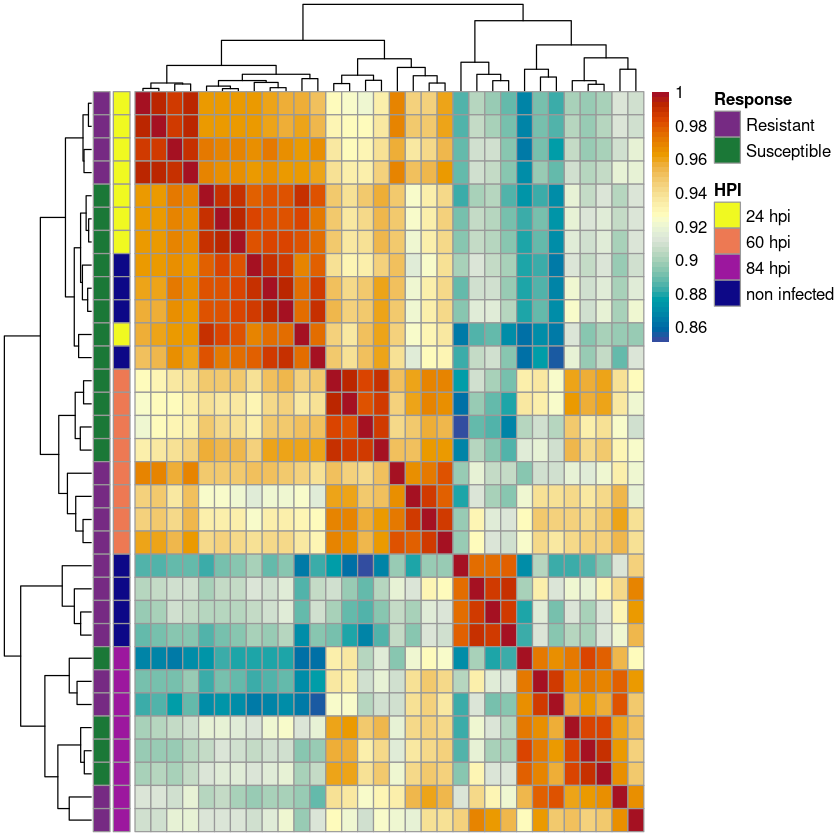

In [22]:
distSamples<-pheatmap(rld_cor,
        color = hcl.colors(50, "RdYlBu",rev = TRUE),
        #cutree_rows = 2,
        #cutree_cols = 2,
        annotation_colors = my_colour,
        #annotation_col =samples_column,
        annotation_row = samples_row,
        cluster_rows = T, 
        cluster_cols = T, # set to FALSE if you want to remove the dendograms
        clustering_distance_cols = 'euclidean',
        clustering_distance_rows = 'euclidean',
        clustering_method = 'complete',
        annotation_names_row = F, 
        annotation_names_col = F,
        show_colnames = F,
        show_rownames = F)

In [23]:
save_pheatmap <- function(x, filename, width=10, height=10, res=300) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   png(filename,width = width, height=height,res = res,units = "in")
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

save_pheatmap_pdf <- function(x, filename, width=10, height=10) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename,width = width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

save_pheatmap_tiff <- function(x, filename, width=10, height=10) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   tiff(filename,width = width, height=height,res = 300,units = "in")
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

In [24]:
save_pheatmap(distSamples, 
              filename="/media/eduardo/D2/mapping_hisat_RNAseq_Lluteus/Anthracnose_papaer_RNAseq/deseq_outputs/plots/Distsamples_hypocotyl.png")
save_pheatmap_pdf(distSamples, 
                  filename="/media/eduardo/D2/mapping_hisat_RNAseq_Lluteus/Anthracnose_papaer_RNAseq/deseq_outputs/plots/Distsamples_hypocotyl.pdf")
save_pheatmap_tiff(distSamples, 
                   filename="/media/eduardo/D2/mapping_hisat_RNAseq_Lluteus/Anthracnose_papaer_RNAseq/deseq_outputs/plots/Distsamples_hypocotyl.tiff")

png 
  2

png 
  2

png 
  2

In [25]:
#------------Contrast time post inoculation  vs control C98 hypocotyl------------


ct_24hpiH<-results(dds, contrast=c("group","024HPIC98hypocotyl","000HPIC98hypocotyl"))
ct_24hpiH <- ct_24hpiH[order(ct_24hpiH$padj),]
ct_24hpiH_filtered<-ct_24hpiH[which(ct_24hpiH$padj  < 0.01),]
DE_list_ct_24hpiH <- subset(ct_24hpiH_filtered, padj < 0.01 & log2FoldChange>= 2 | padj < 0.01 & log2FoldChange <= -2)

write.table(as.data.frame(ct_24hpiH), 
            file="/media/eduardo/D2/mapping_hisat_RNAseq_Lluteus/Anthracnose_papaer_RNAseq/deseq_outputs/C98/ctVS24hpiHypocotyl_all.tsv",
            sep = "\t")

write.table(as.data.frame(DE_list_ct_24hpiH), 
              file="/media/eduardo/D2/mapping_hisat_RNAseq_Lluteus/Anthracnose_papaer_RNAseq/deseq_outputs/C98/ctVS24hpiHypocotyl_DE.tsv",
              sep = "\t")



ct_60hpiH<-results(dds, contrast=c("group","060HPIC98hypocotyl","000HPIC98hypocotyl"))
ct_60hpiH <- ct_60hpiH[order(ct_60hpiH$padj),]
ct_60hpiH_filtered<-ct_60hpiH[which(ct_60hpiH$padj  < 0.01),]
DE_list_ct_60hpiH <- subset(ct_60hpiH_filtered, padj < 0.01 & log2FoldChange>= 2 | padj < 0.01 & log2FoldChange <= -2)


write.table(as.data.frame(ct_60hpiH), 
            file="/media/eduardo/D2/mapping_hisat_RNAseq_Lluteus/Anthracnose_papaer_RNAseq/deseq_outputs/C98/ctVS60hpiHypocotyl_all.tsv",
            sep = "\t")

write.table(as.data.frame(DE_list_ct_60hpiH), 
              file="/media/eduardo/D2/mapping_hisat_RNAseq_Lluteus/Anthracnose_papaer_RNAseq/deseq_outputs/C98/ctVS60hpiHypocotyl_DE.tsv",
              sep = "\t")


ct_84hpiH<-results(dds, contrast=c("group","084HPIC98hypocotyl","000HPIC98hypocotyl"))
ct_84hpiH <- ct_84hpiH[order(ct_84hpiH$padj),]
ct_84hpiH_filtered<-ct_84hpiH[which(ct_84hpiH$padj  < 0.01),]
DE_list_ct_84hpiH <- subset(ct_84hpiH_filtered, padj < 0.01 & log2FoldChange>= 2 | padj < 0.01 & log2FoldChange <= -2)


write.table(as.data.frame(ct_84hpiH), 
            file="/media/eduardo/D2/mapping_hisat_RNAseq_Lluteus/Anthracnose_papaer_RNAseq/deseq_outputs/C98/ctVS84hpiHypocotyl_all.tsv",
            sep = "\t")

write.table(as.data.frame(DE_list_ct_84hpiH), 
              file="/media/eduardo/D2/mapping_hisat_RNAseq_Lluteus/Anthracnose_papaer_RNAseq/deseq_outputs/C98/ctVS84hpiHypocotyl_DE.tsv",
              sep = "\t")

In [26]:
#------------Contrast time post inoculation vs control C195 hypocotyl------------

ct_24hpiHC195<-results(dds, contrast=c("group","024HPIC195hypocotyl","000HPIC195hypocotyl"))
ct_24hpiHC195 <- ct_24hpiHC195[order(ct_24hpiHC195$padj),]
ct_24hpiHC195_filtered<-ct_24hpiHC195[which(ct_24hpiHC195$padj  < 0.01),]
DE_list_ct_24hpiHC195 <- subset(ct_24hpiHC195_filtered, padj < 0.01 & log2FoldChange>= 2 | padj < 0.01 & log2FoldChange <= -2)


write.table(as.data.frame(ct_24hpiHC195), 
            file="/media/eduardo/D2/mapping_hisat_RNAseq_Lluteus/Anthracnose_papaer_RNAseq/deseq_outputs/C195/ctVS24hpiHypocotyl_all.tsv",
            sep = "\t")

write.table(as.data.frame(DE_list_ct_24hpiHC195), 
              file="/media/eduardo/D2/mapping_hisat_RNAseq_Lluteus/Anthracnose_papaer_RNAseq/deseq_outputs/C195/ctVS24hpiHypocotyl_DE.tsv",
              sep = "\t")
ct_60hpiHC195<-results(dds, contrast=c("group","060HPIC195hypocotyl","000HPIC195hypocotyl"))
ct_60hpiHC195 <- ct_60hpiHC195[order(ct_60hpiHC195$padj),]
ct_60hpiHC195_filtered<-ct_60hpiHC195[which(ct_60hpiHC195$padj  < 0.01),]
DE_list_ct_60hpiHC195 <- subset(ct_60hpiHC195_filtered, padj < 0.01 & log2FoldChange>= 2 | padj < 0.01 & log2FoldChange <= -2)


write.table(as.data.frame(ct_60hpiHC195), 
            file="/media/eduardo/D2/mapping_hisat_RNAseq_Lluteus/Anthracnose_papaer_RNAseq/deseq_outputs/C195/ctVS60hpiHypocotyl_all.tsv",
            sep = "\t")

write.table(as.data.frame(DE_list_ct_60hpiHC195), 
              file="/media/eduardo/D2/mapping_hisat_RNAseq_Lluteus/Anthracnose_papaer_RNAseq/deseq_outputs/C195/ctVS60hpiHypocotyl_DE.tsv",
              sep = "\t")


ct_84hpiHC195<-results(dds, contrast=c("group","084HPIC195hypocotyl","000HPIC195hypocotyl"))
ct_84hpiHC195 <- ct_84hpiHC195[order(ct_84hpiHC195$padj),]
ct_84hpiHC195_filtered<-ct_84hpiHC195[which(ct_84hpiHC195$padj  < 0.01),]
DE_list_ct_84hpiHC195 <- subset(ct_84hpiHC195_filtered, padj < 0.01 & log2FoldChange>= 2 | padj < 0.01 & log2FoldChange <= -2)


write.table(as.data.frame(ct_84hpiHC195), 
            file="/media/eduardo/D2/mapping_hisat_RNAseq_Lluteus/Anthracnose_papaer_RNAseq/deseq_outputs/C195/ctVS84hpiHypocotyl_all.tsv",
            sep = "\t")

write.table(as.data.frame(DE_list_ct_84hpiHC195), 
              file="/media/eduardo/D2/mapping_hisat_RNAseq_Lluteus/Anthracnose_papaer_RNAseq/deseq_outputs/C195/ctVS84hpihypocotyl_DE.tsv",
              sep = "\t")